In [6]:
from scipy.special import digamma
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
def lower_bound(T,k,tr):
    """
    tr  The relative threshold.
        This the fraction of the examples that would be on one side of the threshold: N=tr*T."
    """
    result = 0
    result += digamma(T) + digamma(k)
    result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
    result += - (T-2*k)/T*digamma(k) - k/T*(digamma(tr*T+k) + digamma((1-tr)*T+k))
    return result

def max_lower_bound(T,k):
    """
    Same as lower_bound(T,k,0.5) but slightly faster and 1 function call less.
    """
#     result = digamma(T) + digamma(k)
#     result += - digamma(T/2)
#     result += - digamma(k)

    result = 0
    result += digamma(T) + digamma(k)
    result += - digamma(T/2)
    result += - (T-2*k)/T*digamma(k) - 2*k/T*digamma(T/2+k)
    
    return result

def upper_bound(T,k,tr):
    """
    tr  The relative threshold.
        This the fraction of the examples that would be on one side of the threshold: N=tr*T."
    """
    result = 0
    result += digamma(T) + digamma(k)
    result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
    result += - digamma(k)
    return result


def find_begin_range(T,k,n_bins=10,precision=1e-10):
    """
    Efficient solving of upper_bound(T,k,tr)=max_lower_bound(T,k) for tr in [0,0.5] 
    
    tr  is the relative threshold, 
        i.e. the fraction of the examples that would be on one side of the threshold: N=tr*T.
    """
    return binary_search_sorted(
        lambda tr: upper_bound(T,k,tr),
        max_lower_bound(T,k),
        range_min=precision, range_max=0.5,
        n_bins=n_bins, precision=precision
    )

def binary_search_sorted(fun,val,range_min,range_max,n_bins,precision):
    """
    Efficiently search for x so that fun(x)=val, for x in [range_min,range_max].
    precondition: fun(x) is increasing for x in [range_min,range_max].
    A binary search method is used
    """
    r = np.linspace(range_min,range_max,n_bins)
    vals = fun(r)
    i = np.searchsorted(vals,val)
    if (range_max-range_min)/n_bins < precision:
        return r[i-1]
    else:
        return binary_search_sorted(fun, val, r[i-1],r[i], n_bins, precision)

def get_treshold_range(T,k):
    """
    Returns the indices for the threshold range in Z
    """
    tr_min = find_begin_range(T,k)
    i_min = int(T*tr_min)
    i_max = T-i_min
    return i_min,i_max

#### Example on how to use in algorithm

In [8]:
# algorithm input
Z = ((np.random.random(10000)-0.5)*100)
k = 10
n = 1000 #nb of thresholds to try

Z.sort()
t_min, t_max = get_treshold_range(len(Z),k)
print(t_min, t_max)
tresholds = np.linspace(Z[t_min], Z[t_max], n)

# rest of algorithm


4209 5791


## Figures for insight

/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:34: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:8: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)


0.6936474305598211


/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:34: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:8: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)


0.6936474305598211
0.693647430559821
0.6936474305598206
0.693647430559821


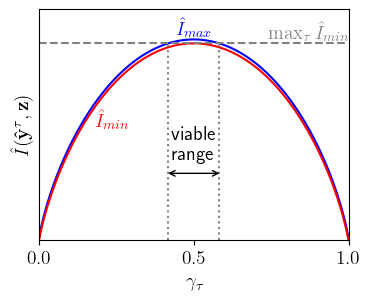

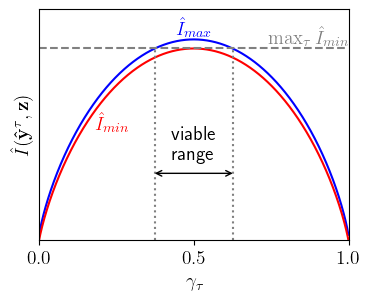

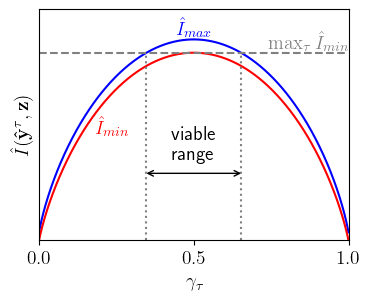

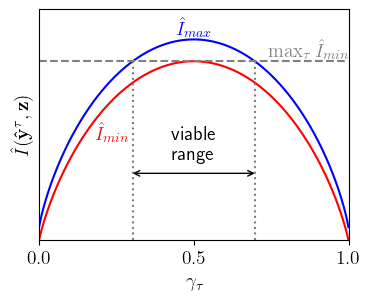

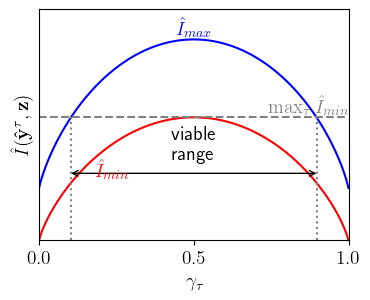

In [14]:



i=np.arange(1000)
k = 5
T = len(i)
r = i/T


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

for k in [1,3,5,10,100]:

    plt.figure(figsize=(4,3))

    ub = upper_bound(T,k,r)
    lb = lower_bound(T,k,r)
    mlb = max_lower_bound(T,k)
    plt.plot(r,ub, label=r"$\hat{I}_{max}$", color='b')
    plt.plot(r,lb, label=r"$\hat{I}_{min}$", color='r')
    plt.plot(r,np.ones(T)*mlb, '--', color="gray", label = r"$\max_\tau\hat{I}_{min}$")

    ymin = min(np.nanmin(ub),np.nanmin(lb))
    ymax = max(np.nanmax(ub),np.nanmax(lb))
    yrange = ymax-ymin

    begin_range, end_range = get_treshold_range(T,k)
    plt.vlines([begin_range/T,end_range/T],ymin,mlb, linestyles=':', color= "gray")

    arrow_y = ymin+yrange/3
    plt.annotate(text='', xy=(begin_range/T,arrow_y), xytext=(end_range/T,arrow_y), arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))


    plt.xlabel(r"$\gamma_\tau$", fontsize=14)
    plt.ylabel(r"$\hat{I}(\mathbf{\hat{y}^\tau, z})$", fontsize=14)
    plt.yticks([])
    plt.xticks([0,.5,1], fontsize=14)
    plt.xlim([0,1])

    plt.ylim([ymin, ymax+0.15*yrange])


    ax = plt.gca()
    ax.text(0.5, np.nanmax(ub)+0.01*yrange,r"$\hat{I}_{max}$",horizontalalignment="center", verticalalignment='bottom', color='b', fontsize=14)
    lb_x = 0.18
    lb_y = lb[int(T*lb_x)]
    ax.text(lb_x, lb_y,r"$\hat{I}_{min}$",horizontalalignment="left", verticalalignment='top', color='r', fontsize=14)
    ax.text(1, mlb+0.01*yrange,r"$\max_\tau\hat{I}_{min}$",horizontalalignment="right", verticalalignment='bottom', color='gray', fontsize=14)
    ax.text(0.5, arrow_y+0.05*yrange,"viable\nrange",horizontalalignment="center", verticalalignment='bottom', color='black', fontsize=14)

    print(np.nanmax(ub))
    # plt.legend()
    plt.savefig('mi_threshold_range_k'+str(k)+'_paper.pdf', bbox_inches="tight")


/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:34: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:8: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:34: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)
/var/folders/wz/dybgbk657y79z766slnkj4c00000gn/T/ipykernel_91197/4123113844.py:8: RuntimeWarning: invalid value encountered in multiply
  result += - tr*digamma(tr*T) - (1-tr)*digamma((1-tr)*T)


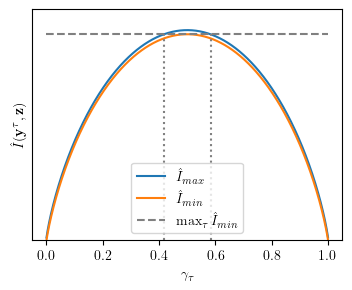

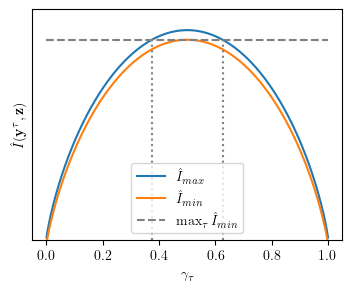

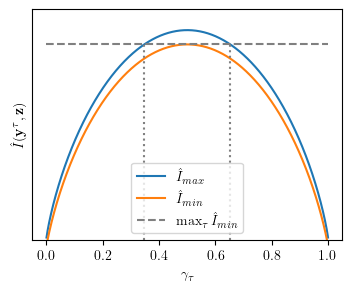

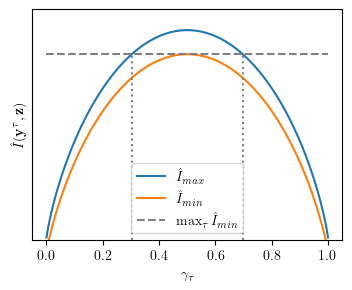

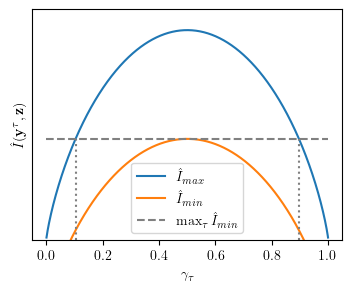

In [10]:
i=np.arange(1000)
T = len(i)
r = i/T
for k in [1,3,5,10,100]:
    plt.figure(figsize=(4,3))
    ub = upper_bound(T,k,r)
    lb = lower_bound(T,k,r)
    mlb = max_lower_bound(T,k)
    plt.plot(r,ub, label=r"$\hat{I}_{max}$")
    plt.plot(r,lb, label=r"$\hat{I}_{min}$")
    plt.plot(r,np.ones(T)*mlb, '--', color="gray", label = r"$\max_\tau\hat{I}_{min}$")
    
    begin_range, end_range = get_treshold_range(T,k)
    plt.vlines([begin_range/T,end_range/T],0,mlb, linestyles=':', color= "gray")
    
    plt.xlabel(r"$\gamma_\tau$")
    plt.ylabel(r"$\hat{I}(\mathbf{y^\tau, z})$")
    plt.yticks([])
    plt.ylim([0,ub[int(len(i)/2)]*1.1])
    plt.legend()
    plt.savefig('mi_threshold_range_k'+str(k)+'.pdf', bbox_inches="tight")
    

## How large is the fraction of instances considered for the threshold?

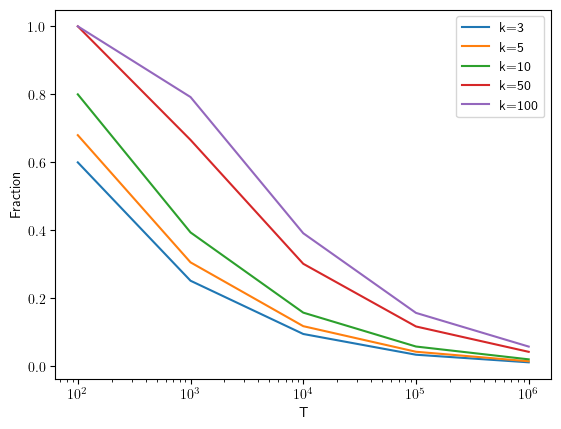

In [11]:
Ts = [100,1000,10000,100000,1000000]
ks = [3,5,10,50,100]
for k in ks:
    fractions = []
    for T in Ts:
        begin_range, end_range = get_treshold_range(T,k)
        fractions +=[(end_range-begin_range)/T]
    plt.plot(Ts, fractions, label="k="+str(k))

plt.xscale('log')
plt.xlabel('T')
plt.ylabel('Fraction')
plt.legend()